<a href="https://colab.research.google.com/github/atakanerdogn/OESON-Data-Science/blob/main/oeson_heart_failure_part_1_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OESON PROJECT 2 - HEART FAILURE PREDICTION

VERSION 1 // Data Analysis

NAZIM ATAKAN ERDOGAN


Necessary Medical Background/Notes

1. Sodium plays a key role in fluid balance. When sodium intake is high, the body retains more fluid, increasing blood volume and placing extra strain on the heart and blood vessels. This can worsen symptoms like fluid buildup, swelling, and shortness of breath.
2. NT-proBNP is a biomarker used in the diagnosis and monitoring of heart failure. It is a fragment of brain natriuretic peptide (BNP) that is produced in the heart and released in response to volume or pressure stress. NT-proBNP is used more frequently than BNP itself, as it has a longer half-life in the blood. An elevated NT-proBNP level may indicate heart failure or other cardiovascular problems.
high nt probnp a high cardiac failure
4. Systolic blood pressure is the top number in a blood pressure reading, representing the pressure in your arteries when your heart beats and pumps blood out. It is the highest pressure exerted by your blood against the artery walls during the heart's contraction phase. A normal systolic blood pressure is typically less than 120 mmHg.
5. Diastolic blood pressure, the pressure in your arteries between heartbeats, is strongly linked to heart failure, particularly diastolic heart failure. Low diastolic blood pressure can increase the risk of heart failure, while high diastolic blood pressure can contribute to the development of heart failure with preserved ejection fraction (HFpEF), also known as diastolic heart failure.


- sources: American Heart Association, JHU Medicine





Project plan:
- matching interrelating features together and grouping them together,
- finding relationships between different factors from a medical perspective
1. NT proBNP is an indicator for heart failure, the higher it gets the worsen the symptoms
2. Blood density related: sodium, creatinine, BUN,hemoglobin
3. Blood pressure and heart power related:Systolic BP, Diastolic BP, sodium,  
4. Heart pumping related: pulse, ejection fraction, diastolic bp, systolic bp,
5. repiratory related: sodium, hemoglobin, respirator rate
6. readmission, lenght of stay, ejection fraction, discharge disposition, previous admissions



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/1746182849060_cfbd6a1f82.csv')
df.head()

,Patient_ID,Age,Gender,Ethnicity,Length_of_Stay,Previous_Admissions,Discharge_Disposition,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days
0,1,83,Male,Other,7,4,Rehab,119,37.1,147,160,99,27,11,0.61,127,13.1,2973,39,0
1,2,73,Female,Hispanic,10,2,Home,107,38.4,54,151,75,13,15,1.48,145,11.4,3220,56,0
2,3,59,Female,White,5,1,Expired,63,39.0,118,112,57,21,26,1.54,147,10.9,1190,50,0
3,4,87,Female,White,8,3,Expired,86,39.2,80,135,55,27,34,1.63,133,10.1,2934,29,1
4,5,52,Female,Asian,1,1,Home,117,38.5,94,145,79,16,32,2.57,146,12.8,4324,37,0


In [ ]:
df.describe()

,Patient_ID,Age,Length_of_Stay,Previous_Admissions,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,67.000000,7.407000,1.948000,84.714000,37.715300,98.77000,135.493000,79.289000,20.563000,23.139000,1.772730,137.097000,12.53170,2552.547000,44.149000,0.287000
std,288.819436,12.945562,4.086325,1.429454,20.022465,1.001438,29.20853,25.956303,17.348327,5.103732,9.381241,0.715125,7.019178,2.58824,1416.044376,14.733699,0.452588
min,1.000000,45.000000,1.000000,0.000000,50.000000,36.000000,50.00000,90.000000,50.000000,12.000000,7.000000,0.500000,125.000000,8.00000,100.000000,20.000000,0.000000
25%,250.750000,56.000000,4.000000,1.000000,67.000000,36.800000,74.00000,112.000000,65.000000,16.000000,15.000000,1.190000,131.000000,10.40000,1352.750000,32.000000,0.000000
50%,500.500000,68.000000,7.000000,2.000000,85.000000,37.700000,97.00000,136.000000,79.000000,21.000000,23.000000,1.770000,137.000000,12.60000,2546.000000,43.500000,0.000000
75%,750.250000,78.000000,11.000000,3.000000,102.000000,38.600000,125.00000,159.000000,94.250000,25.000000,31.000000,2.380000,143.000000,14.80000,3747.250000,57.000000,1.000000
max,1000.000000,89.000000,14.000000,4.000000,119.000000,39.500000,149.00000,179.000000,109.000000,29.000000,39.000000,3.000000,149.000000,17.00000,4997.000000,69.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Gender                 1000 non-null   object 
 3   Ethnicity              1000 non-null   object 
 4   Length_of_Stay         1000 non-null   int64  
 5   Previous_Admissions    1000 non-null   int64  
 6   Discharge_Disposition  1000 non-null   object 
 7   Pulse                  1000 non-null   int64  
 8   Temperature            1000 non-null   float64
 9   Heart_Rate             1000 non-null   int64  
 10  Systolic_BP            1000 non-null   int64  
 11  Diastolic_BP           1000 non-null   int64  
 12  Respiratory_Rate       1000 non-null   int64  
 13  BUN                    1000 non-null   int64  
 14  Creatinine             1000 non-null   float64
 15  Sodiu

In [ ]:
df.count()

,0
Patient_ID,1000
Age,1000
Gender,1000
Ethnicity,1000
Length_of_Stay,1000
Previous_Admissions,1000
Discharge_Disposition,1000
Pulse,1000
Temperature,1000
Heart_Rate,1000


In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Ethnicity,0
Length_of_Stay,0
Previous_Admissions,0
Discharge_Disposition,0
Pulse,0
Temperature,0
Heart_Rate,0


In [ ]:
data_num = df.select_dtypes(exclude='object')
data_cat = df.select_dtypes(include='object')

In [ ]:
data_cat.columns

Index(['Gender', 'Ethnicity', 'Discharge_Disposition'], dtype='object')

<Axes: xlabel='Ethnicity', ylabel='count'>

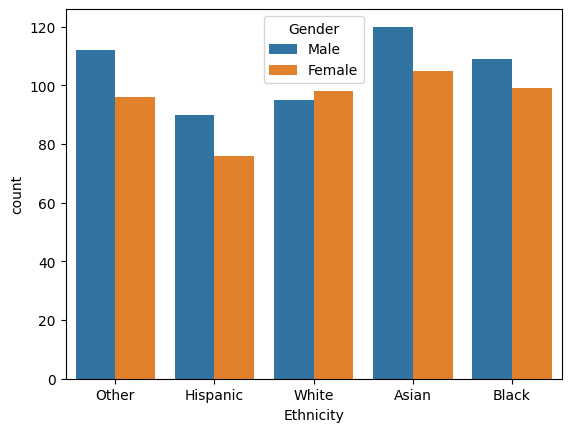

In [ ]:
sns.countplot(x='Ethnicity', hue='Gender', data=df)

In [ ]:
df['Discharge_Disposition'].value_counts()

,count
Discharge_Disposition,
Expired,268
Nursing Facility,259
Rehab,237
Home,236


<Axes: xlabel='Discharge_Disposition', ylabel='Length_of_Stay'>

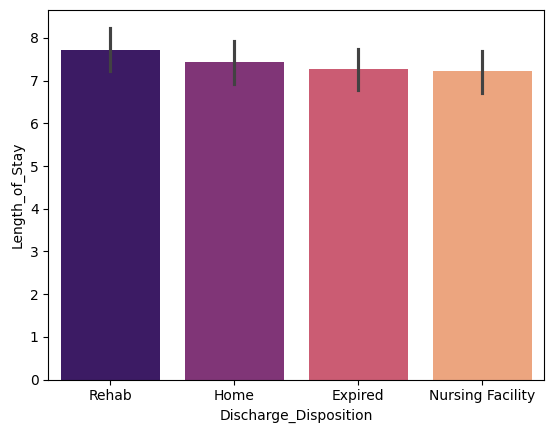

In [ ]:
# discharge disposition vs lenght of stay

dl = df.groupby('Discharge_Disposition')['Length_of_Stay'].mean()
dl.head()

sns.barplot(x='Discharge_Disposition', y='Length_of_Stay', data=df, palette='magma')

In [ ]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Ethnicity', 'Length_of_Stay',
       'Previous_Admissions', 'Discharge_Disposition', 'Pulse', 'Temperature',
       'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Respiratory_Rate', 'BUN',
       'Creatinine', 'Sodium', 'Hemoglobin', 'NT_proBNP', 'Ejection_Fraction',
       'Readmission_30Days'],
      dtype='object')

In [ ]:
data_num.columns

Index(['Patient_ID', 'Age', 'Length_of_Stay', 'Previous_Admissions', 'Pulse',
       'Temperature', 'Heart_Rate', 'Systolic_BP', 'Diastolic_BP',
       'Respiratory_Rate', 'BUN', 'Creatinine', 'Sodium', 'Hemoglobin',
       'NT_proBNP', 'Ejection_Fraction', 'Readmission_30Days'],
      dtype='object')

In [ ]:
data_num = data_num.drop(columns=['Patient_ID'], axis=1)

In [ ]:
data_num.columns

Index(['Age', 'Length_of_Stay', 'Previous_Admissions', 'Pulse', 'Temperature',
       'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Respiratory_Rate', 'BUN',
       'Creatinine', 'Sodium', 'Hemoglobin', 'NT_proBNP', 'Ejection_Fraction',
       'Readmission_30Days'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Length_of_Stay'>

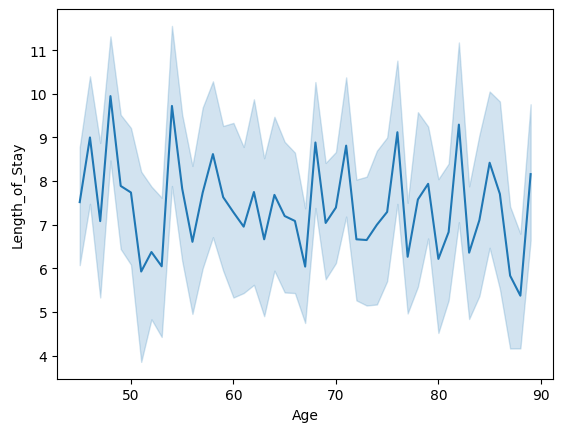

In [ ]:
# age and lenght of stay

als = df.groupby('Age')['Length_of_Stay'].mean()
als.head()

sns.lineplot(x='Age', y='Length_of_Stay', data=df)

<Axes: xlabel='Length_of_Stay', ylabel='Previous_Admissions'>

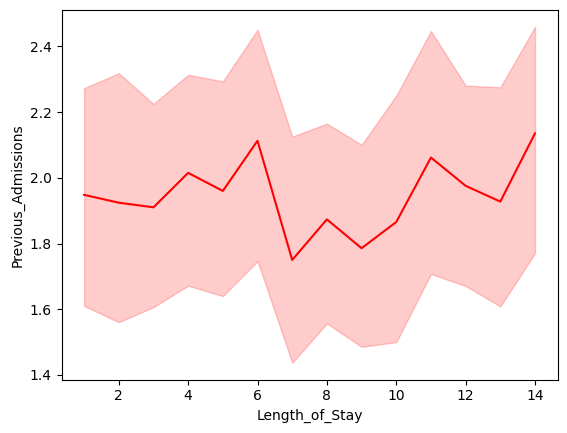

In [ ]:
#lenght of stay vs previous admissions

lofsprev = df.groupby('Length_of_Stay')[['Previous_Admissions']].mean()
lofsprev.head()

sns.lineplot(x='Length_of_Stay', y='Previous_Admissions', data=df, color='red')

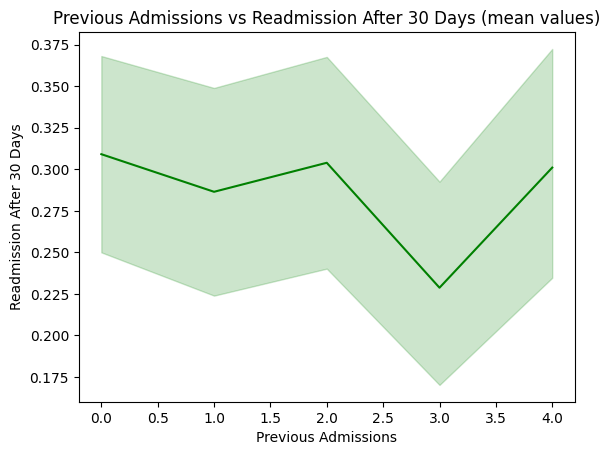

In [ ]:
# previous admissions and readmission after 30 days

pa30 = df.groupby('Previous_Admissions')[['Readmission_30Days']].mean()
pa30.head()

sns.lineplot(x='Previous_Admissions', y='Readmission_30Days', data=df, color='green')
plt.title('Previous Admissions vs Readmission After 30 Days (mean values)')
plt.xlabel('Previous Admissions')
plt.ylabel('Readmission After 30 Days')
plt.show()

In [ ]:
# group by pulse, temperature, heart rate

pth = df.groupby('Pulse')[['Temperature', 'Pulse']].mean()
pth

corr_matrix = pth.corr()
corr_matrix.style.background_gradient(cmap='Reds')

,Temperature,Pulse
Temperature,1.000000,0.093119
Pulse,0.093119,1.000000


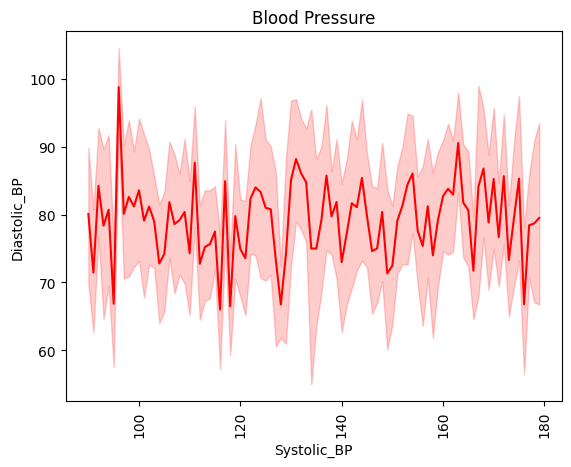

In [ ]:
sns.lineplot(x='Systolic_BP', y='Diastolic_BP', data=df,color ='red')
plt.xticks(rotation=90)
plt.title('Blood Pressure')
plt.show()


In [ ]:
# ejection fraction, systolic bp, diastolic bp, nt probnp

ef = df.groupby('Ejection_Fraction')[['Systolic_BP', 'Diastolic_BP', 'NT_proBNP']].mean()
ef

,Systolic_BP,Diastolic_BP,NT_proBNP
Ejection_Fraction,,,
20,121.333333,73.476190,2657.238095
21,132.551724,82.482759,2939.137931
22,139.681818,83.363636,3125.454545
23,138.421053,84.157895,2390.263158
24,135.937500,78.875000,3141.312500
25,133.190476,81.285714,2533.190476
26,137.176471,81.176471,2493.411765
27,137.695652,73.086957,2529.478261
28,132.571429,78.285714,2238.285714


Here's a breakdown of ejection fraction ranges:
Normal: 50% to 70%
Mildly Reduced: 41% to 49%
Reduced: 40% or less
Moderately Abnormal: 30% to 40%
Severely Abnormal: Less than 30

<Axes: xlabel='Ejection_Fraction'>

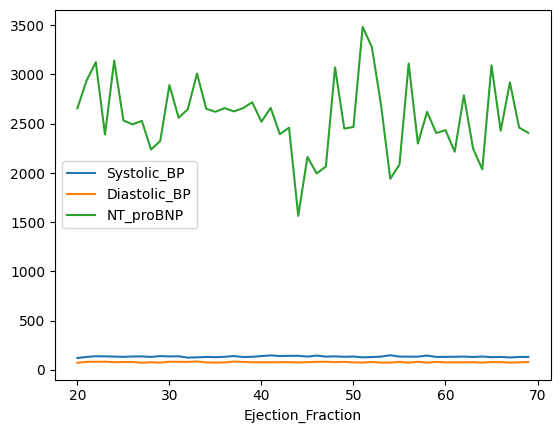

In [ ]:
ef.plot(kind='line')

<Axes: xlabel='Heart_Rate'>

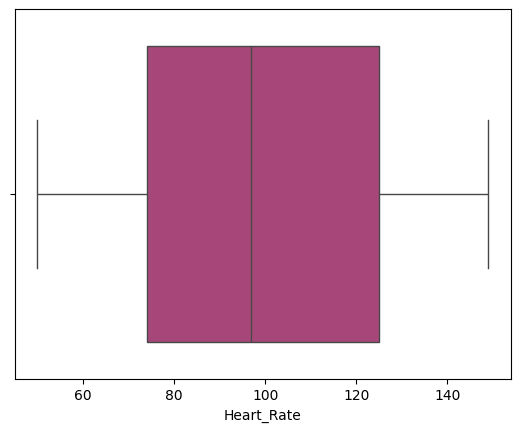

In [ ]:
sns.boxplot(x='Heart_Rate', data=df, palette='magma')

<Axes: ylabel='Diastolic_BP'>

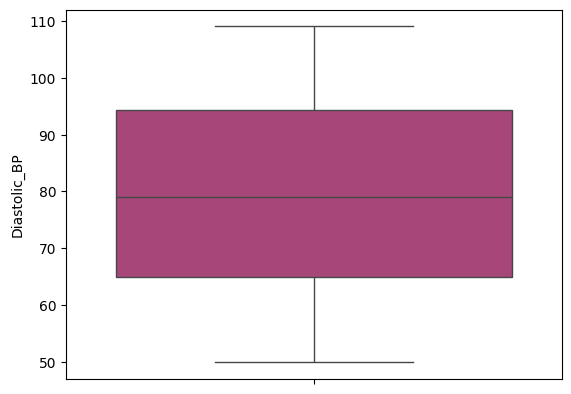

In [ ]:
sns.boxplot(y='Diastolic_BP', data=df, palette='magma')

<Axes: xlabel='Creatinine'>

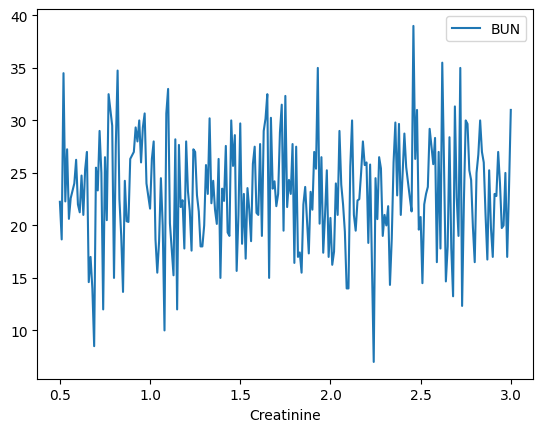

In [ ]:
#creatinine and blood urine nitrogen  // both are classified as waste in blood,

cbun = df.groupby('Creatinine')[['BUN']].mean()
cbun.plot(kind='line')

<Axes: xlabel='BUN'>

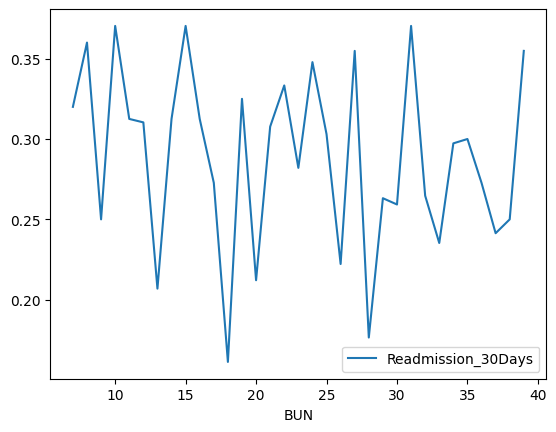

In [ ]:
#bun and readmission

br = df.groupby('BUN')[['Readmission_30Days']].mean()
br.plot(kind='line')



<Axes: xlabel='NT_proBNP'>

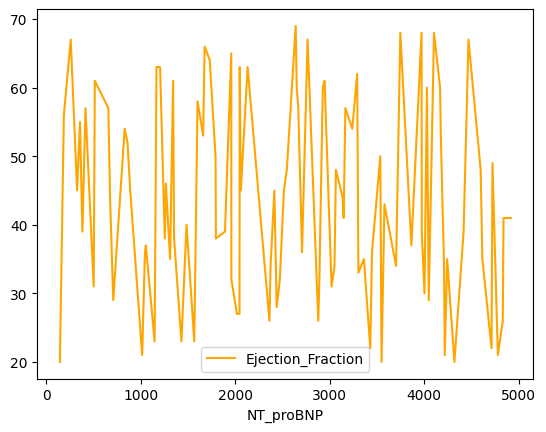

In [ ]:
# readmission in 30 days
# nt bnp and ejection

ntbnp =df['NT_proBNP'].sample(100)

nhsd = df.groupby(ntbnp)[['Ejection_Fraction']].mean()
nhsd.plot(kind='line', color='orange')

<Axes: xlabel='Creatinine'>

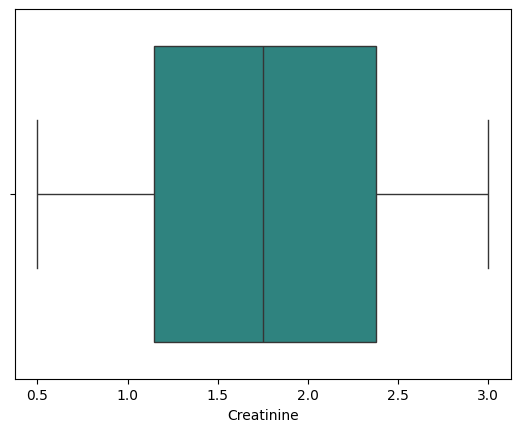

In [ ]:
sns.boxplot(x='Creatinine', data=cbun,palette='viridis')

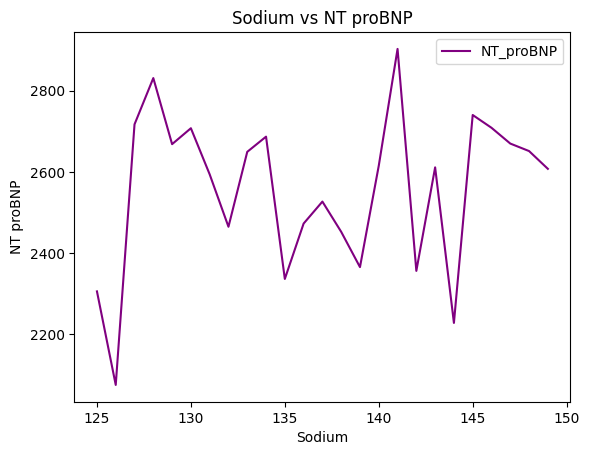

In [ ]:
# nt pro nbp and sodium

ns = df.groupby('Sodium')[['NT_proBNP']].mean()
ns.plot(kind='line', color='purple')
plt.title('Sodium vs NT proBNP')
plt.xlabel('Sodium')
plt.ylabel('NT proBNP')
plt.show()

<Axes: xlabel='Sodium'>

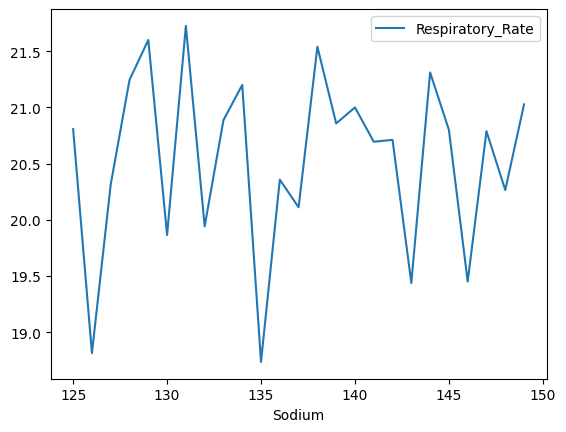

In [ ]:
#sodium and respiratory rate

sr = df.groupby('Sodium')[['Respiratory_Rate']].mean()
sr.plot(kind='line')


<Axes: xlabel='Heart_Rate'>

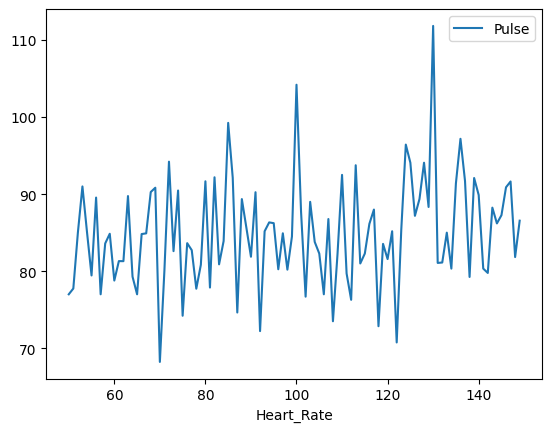

In [ ]:
# heart rate, pulse

hrp = df.groupby('Heart_Rate')[['Pulse']].mean()
hrp.plot(kind='line')

<Axes: xlabel='Heart_Rate'>

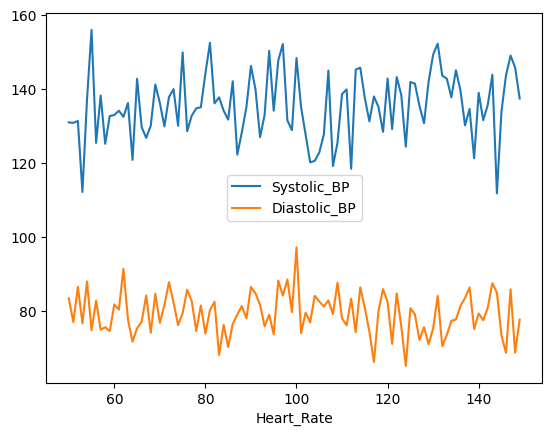

In [ ]:
# heart rate, systolic bp, diastolic bp

hdp = df.groupby('Heart_Rate')[['Systolic_BP', 'Diastolic_BP']].mean()
hdp.plot(kind='line')

In [ ]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Ethnicity', 'Length_of_Stay',
       'Previous_Admissions', 'Discharge_Disposition', 'Pulse', 'Temperature',
       'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Respiratory_Rate', 'BUN',
       'Creatinine', 'Sodium', 'Hemoglobin', 'NT_proBNP', 'Ejection_Fraction',
       'Readmission_30Days'],
      dtype='object')

<Axes: xlabel='Pulse'>

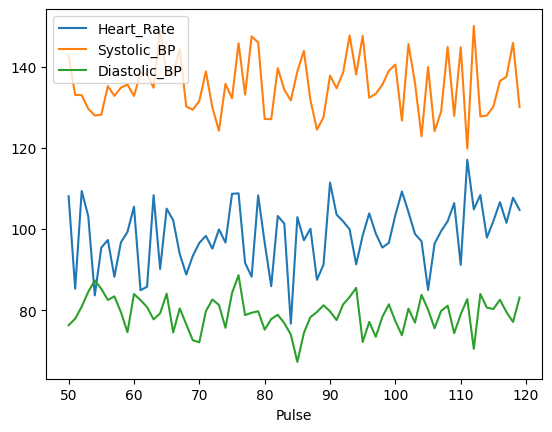

In [ ]:
# pulse vs heart rate vs systolic bp vs diastolic bp

pulse = df.groupby('Pulse')[['Heart_Rate', 'Systolic_BP', 'Diastolic_BP']].mean()
pulse.plot(kind='line')

<Axes: xlabel='Heart_Rate'>

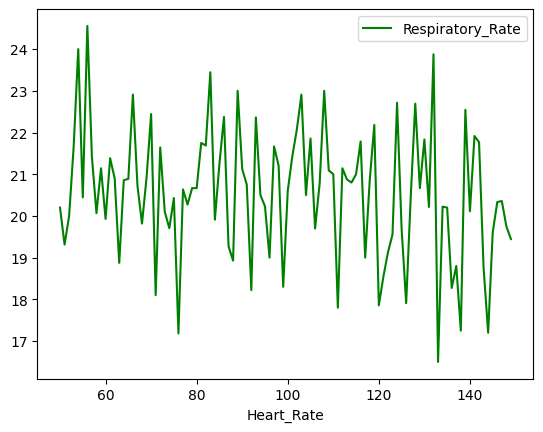

In [ ]:
# heart rate vs respiratory rate

hr = df.groupby('Heart_Rate')[['Respiratory_Rate']].mean()
hr.plot(kind='line', color='green')

<Axes: xlabel='Ejection_Fraction'>

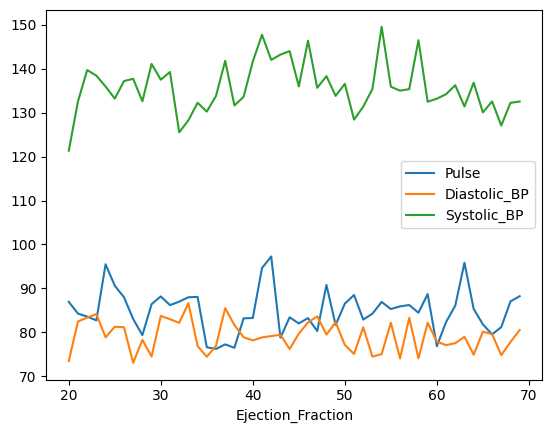

In [ ]:
# ejection fraction vs pulse vs dystolic vs systolic

ef = df.groupby('Ejection_Fraction')[['Pulse', 'Diastolic_BP', 'Systolic_BP']].mean()
ef.plot(kind='line')

<Axes: xlabel='Hemoglobin'>

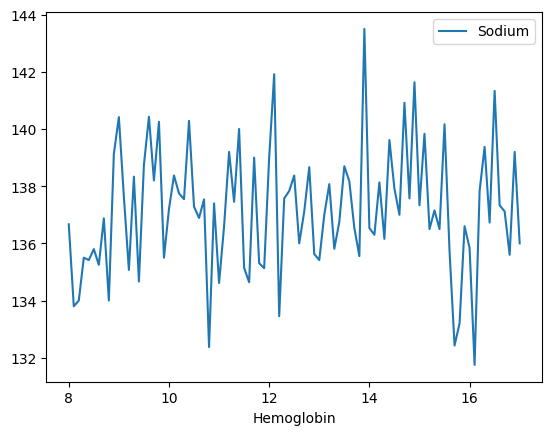

In [ ]:
# hemoglobin and sodium

hs = df.groupby('Hemoglobin')[['Sodium']].mean()
hs.plot(kind='line')

<Axes: xlabel='Hemoglobin'>

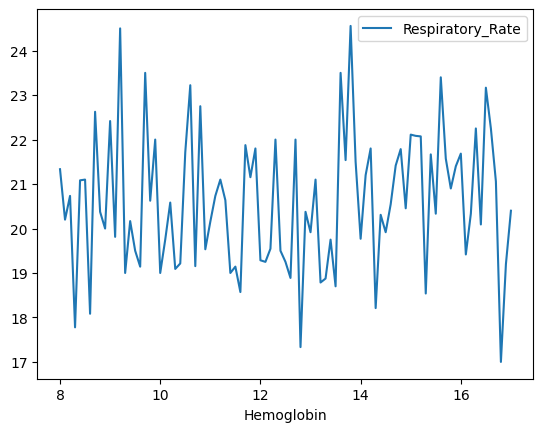

In [ ]:
# hemoglobin and respiratory rate

hr = df.groupby('Hemoglobin')[['Respiratory_Rate']].mean()
hr.plot(kind='line')

In [ ]:
df1 = df.drop(columns=['Patient_ID'], axis=1)

In [ ]:
df1.columns

Index(['Age', 'Gender', 'Ethnicity', 'Length_of_Stay', 'Previous_Admissions',
       'Discharge_Disposition', 'Pulse', 'Temperature', 'Heart_Rate',
       'Systolic_BP', 'Diastolic_BP', 'Respiratory_Rate', 'BUN', 'Creatinine',
       'Sodium', 'Hemoglobin', 'NT_proBNP', 'Ejection_Fraction',
       'Readmission_30Days'],
      dtype='object')

In [ ]:
df1_num = df1.select_dtypes(exclude='object')
df1_cat = df1.select_dtypes(include='object')

In [ ]:
corr_matrix1 = df1_num.corr()
corr_matrix1.style.background_gradient(cmap='Reds')

,Age,Length_of_Stay,Previous_Admissions,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days
Age,1.000000,-0.050315,0.056311,0.039827,0.013937,-0.005027,0.007579,0.038839,-0.002833,0.066178,0.031193,0.016282,-0.048995,0.050514,-0.000084,-0.015889
Length_of_Stay,-0.050315,1.000000,0.014080,0.071772,-0.039658,-0.011241,0.000890,0.092762,-0.003991,0.055656,0.061274,-0.006089,-0.023917,0.020599,0.012658,-0.021547
Previous_Admissions,0.056311,0.014080,1.000000,0.008433,0.060413,0.029466,0.051762,0.045694,0.005526,-0.030737,0.007787,-0.011169,-0.029559,0.036434,-0.042122,-0.023326
Pulse,0.039827,0.071772,0.008433,1.000000,0.028769,0.072638,-0.002772,-0.033885,0.042415,0.002578,0.016079,0.048217,0.020984,-0.035456,-0.007897,-0.027275
Temperature,0.013937,-0.039658,0.060413,0.028769,1.000000,0.001678,-0.007827,0.051895,-0.091817,-0.006545,0.020454,-0.047732,-0.008568,0.019347,-0.061735,0.025197
Heart_Rate,-0.005027,-0.011241,0.029466,0.072638,0.001678,1.000000,0.056909,-0.041205,-0.048498,-0.046979,0.046199,0.007359,-0.021322,-0.004015,0.032058,0.002045
Systolic_BP,0.007579,0.000890,0.051762,-0.002772,-0.007827,0.056909,1.000000,0.026977,-0.053291,0.007097,-0.037243,-0.051375,0.013188,0.052728,-0.008662,0.055259
Diastolic_BP,0.038839,0.092762,0.045694,-0.033885,0.051895,-0.041205,0.026977,1.000000,0.004639,-0.036732,-0.006514,-0.067259,-0.003457,0.040573,-0.043216,0.006254
Respiratory_Rate,-0.002833,-0.003991,0.005526,0.042415,-0.091817,-0.048498,-0.053291,0.004639,1.000000,0.023849,-0.058069,0.004957,0.038992,-0.003170,-0.000371,-0.024086
BUN,0.066178,0.055656,-0.030737,0.002578,-0.006545,-0.046979,0.007097,-0.036732,0.023849,1.000000,0.010812,-0.010831,0.059864,-0.012189,0.107047,-0.019307


In [ ]:
df_heart_specific = df[['Systolic_BP', 'Diastolic_BP', 'Ejection_Fraction', 'Heart_Rate', 'Readmission_30Days']]
samp = df_heart_specific.sample(100)
samp.corr()

,Systolic_BP,Diastolic_BP,Ejection_Fraction,Heart_Rate,Readmission_30Days
Systolic_BP,1.000000,0.102957,-0.103993,-0.094469,0.130213
Diastolic_BP,0.102957,1.000000,0.029999,-0.174024,0.115524
Ejection_Fraction,-0.103993,0.029999,1.000000,-0.033239,0.019509
Heart_Rate,-0.094469,-0.174024,-0.033239,1.000000,0.051987
Readmission_30Days,0.130213,0.115524,0.019509,0.051987,1.000000


<Axes: >

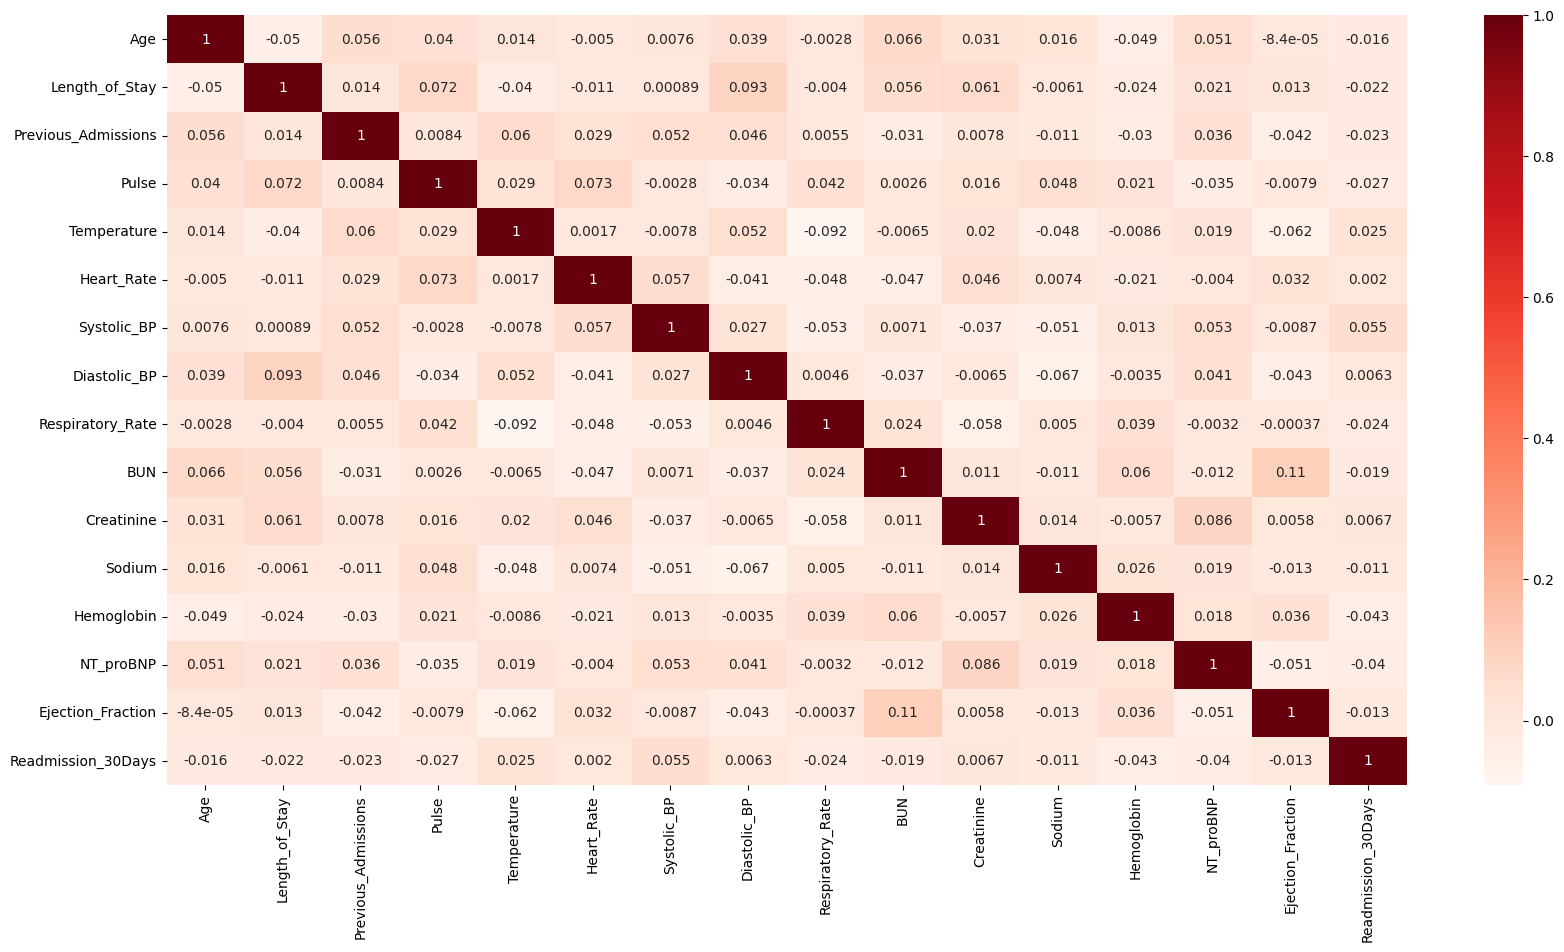

In [ ]:
# correlation matrix

corr_matrix = df1_num.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')

In [ ]:
df_neww = df1_num[['Length_of_Stay', 'Readmission_30Days', 'Previous_Admissions', 'Ejection_Fraction']]
df_neww.corr()

,Length_of_Stay,Readmission_30Days,Previous_Admissions,Ejection_Fraction
Length_of_Stay,1.000000,-0.021547,0.014080,0.012658
Readmission_30Days,-0.021547,1.000000,-0.023326,-0.013325
Previous_Admissions,0.014080,-0.023326,1.000000,-0.042122
Ejection_Fraction,0.012658,-0.013325,-0.042122,1.000000


In [ ]:
df1_num.columns

Index(['Age', 'Length_of_Stay', 'Previous_Admissions', 'Pulse', 'Temperature',
       'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Respiratory_Rate', 'BUN',
       'Creatinine', 'Sodium', 'Hemoglobin', 'NT_proBNP', 'Ejection_Fraction',
       'Readmission_30Days'],
      dtype='object')

In [ ]:
# systolic vs diastolic vs heart rate vs ejection fraction

group1 = df1_num.groupby('Heart_Rate')[['Diastolic_BP', 'Systolic_BP', 'Ejection_Fraction']].mean()
corr_group1 = group1.corr()
corr_group1.style.background_gradient(cmap='Reds')

,Diastolic_BP,Systolic_BP,Ejection_Fraction
Diastolic_BP,1.000000,0.035642,-0.090698
Systolic_BP,0.035642,1.000000,-0.003413
Ejection_Fraction,-0.090698,-0.003413,1.000000


<Axes: xlabel='Length_of_Stay', ylabel='Count'>

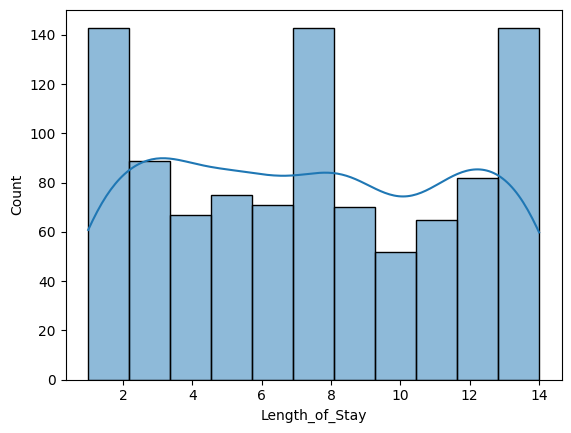

In [ ]:
sns.histplot(df1_num['Length_of_Stay'], kde=True)

<Axes: xlabel='Creatinine', ylabel='Count'>

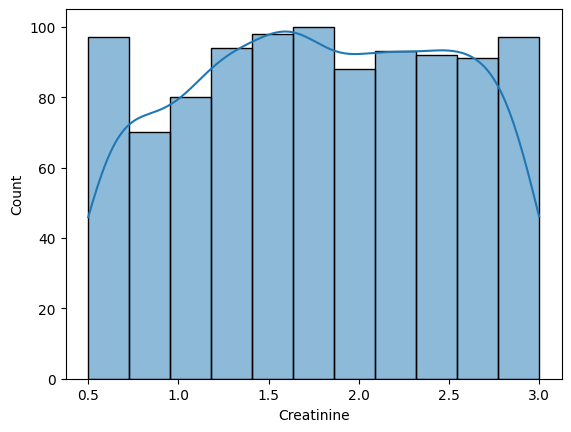

In [ ]:
sns.histplot(df1_num['Creatinine'], kde=True)

In [ ]:
df1_cat.columns

Index(['Gender', 'Ethnicity', 'Discharge_Disposition'], dtype='object')

<Axes: xlabel='Gender', ylabel='Length_of_Stay'>

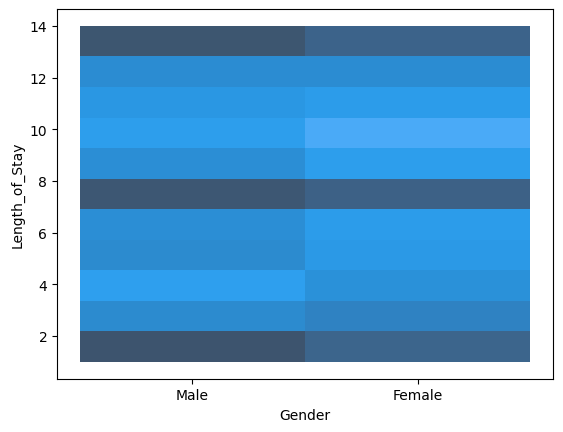

In [ ]:
sns.histplot(x=df1['Gender'], y=df1['Length_of_Stay'])

<Axes: xlabel='Readmission_30Days', ylabel='Length_of_Stay'>

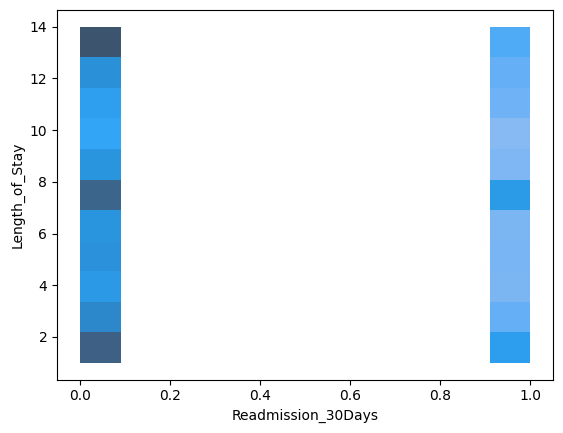

In [ ]:
sns.histplot(x=df1['Readmission_30Days'], y=df1['Length_of_Stay'])

<Axes: xlabel='Systolic_BP', ylabel='Diastolic_BP'>

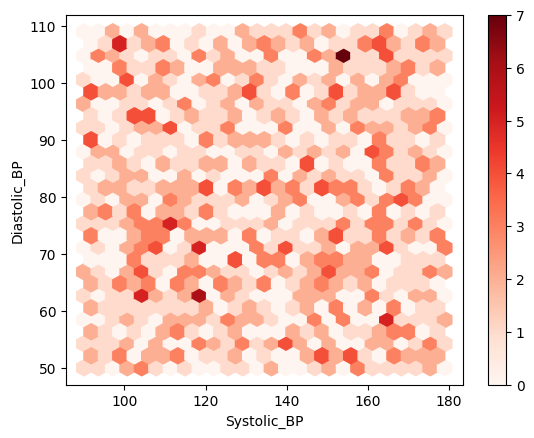

In [ ]:
#systolic vs diastolic vs heart rate

df1.plot(kind='hexbin', x='Systolic_BP', y='Diastolic_BP', gridsize=25, cmap='Reds')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Patient_ID'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Length_of_Stay'),
  Text(3, 0, 'Previous_Admissions'),
  Text(4, 0, 'Pulse'),
  Text(5, 0, 'Temperature'),
  Text(6, 0, 'Heart_Rate'),
  Text(7, 0, 'Systolic_BP'),
  Text(8, 0, 'Diastolic_BP'),
  Text(9, 0, 'Respiratory_Rate'),
  Text(10, 0, 'BUN'),
  Text(11, 0, 'Creatinine'),
  Text(12, 0, 'Sodium'),
  Text(13, 0, 'Hemoglobin'),
  Text(14, 0, 'NT_proBNP'),
  Text(15, 0, 'Ejection_Fraction'),
  Text(16, 0, 'Readmission_30Days')])

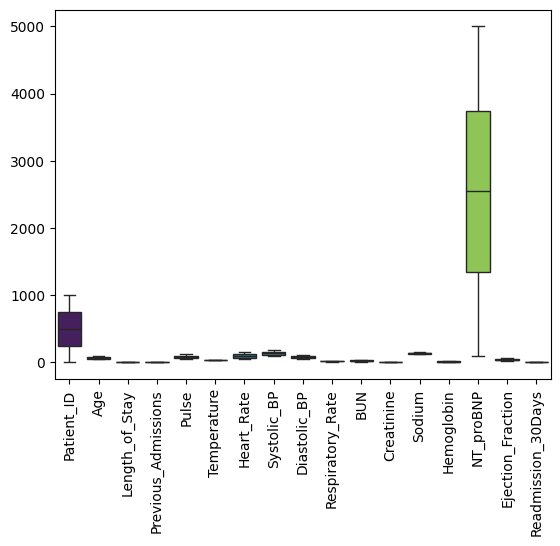

In [ ]:
sns.boxplot(df, palette ='viridis')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Pulse'),
  Text(1, 0, 'Heart_Rate'),
  Text(2, 0, 'Systolic_BP'),
  Text(3, 0, 'Diastolic_BP'),
  Text(4, 0, 'Sodium'),
  Text(5, 0, 'Creatinine'),
  Text(6, 0, 'BUN'),
  Text(7, 0, 'Hemoglobin')])

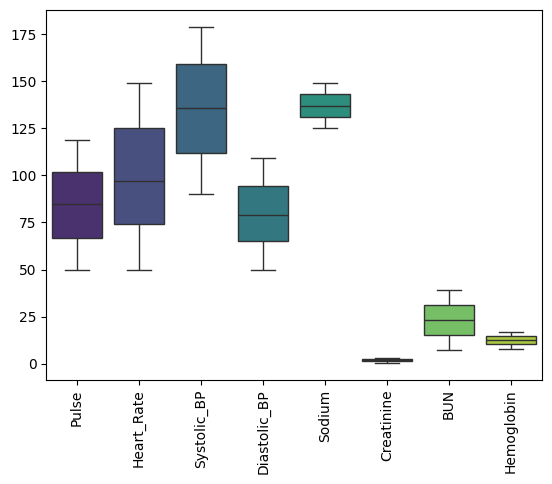

In [ ]:
data = df1_num[['Length_of_Stay', 'Readmission_30Days', 'Previous_Admissions', 'Ejection_Fraction']]
data2 = df1_num[['Pulse', 'Heart_Rate', 'Systolic_BP', 'Diastolic_BP','Sodium', 'Creatinine', 'BUN', 'Hemoglobin']]

sns.boxplot(data2, palette='viridis')
plt.xticks(rotation=90)

<Axes: xlabel='NT_proBNP'>

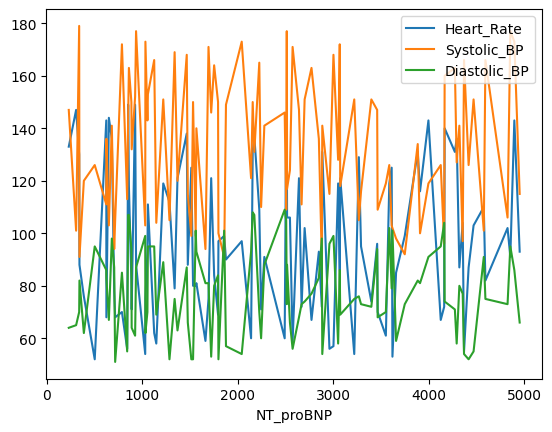

In [ ]:
# nt bnp and heart rate and systolic bp and diastolic bp
# i took a sample as the data is large

ntbnp =df['NT_proBNP'].sample(100)

nhsd = df.groupby(ntbnp)[['Heart_Rate', 'Systolic_BP', 'Diastolic_BP']].mean()
nhsd.plot(kind='line')

### **MACHINE LEARNING PART**

some models will be tested to look for the best fitting one.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

Mean Squared Error: 226.48224690078175
R-squared: -0.012147942495130293


Text(0.5, 1.0, 'Actual vs Predicted Values')

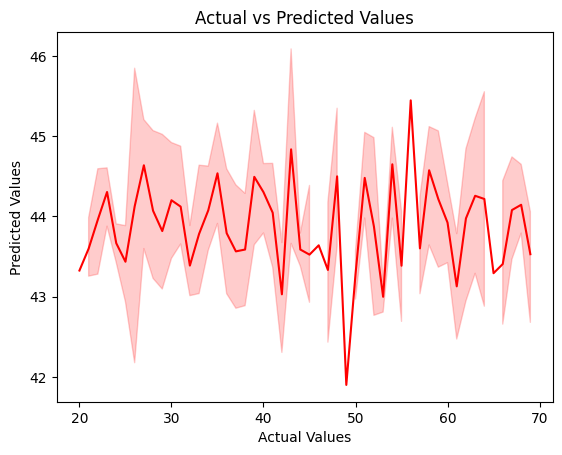

In [ ]:
x = df1_num[['Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'Readmission_30Days']]
y = df1_num['Ejection_Fraction']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

L = LinearRegression()
L.fit(x_train, y_train)

y_pred = L.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

sns.lineplot(x=y_test, y=y_pred, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [ ]:
x = df1_num.drop(columns=['Length_of_Stay'], axis=1)
y = df1_num['Length_of_Stay']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

L = LinearRegression()
L.fit(x_train, y_train)

y_pred = L.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)




Mean Squared Error: 17.077966899513754
R-squared: 0.0007041018423783463


Text(0.5, 1.0, 'Actual vs Predicted Values')

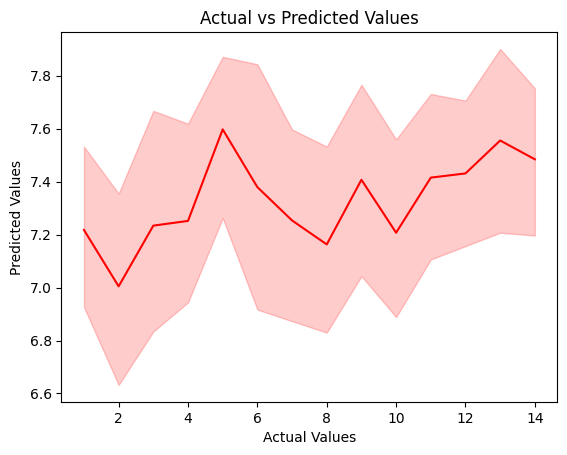

In [ ]:
sns.lineplot(x=y_test, y=y_pred, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [ ]:
df1.columns

Index(['Age', 'Gender', 'Ethnicity', 'Length_of_Stay', 'Previous_Admissions',
       'Discharge_Disposition', 'Pulse', 'Temperature', 'Heart_Rate',
       'Systolic_BP', 'Diastolic_BP', 'Respiratory_Rate', 'BUN', 'Creatinine',
       'Sodium', 'Hemoglobin', 'NT_proBNP', 'Ejection_Fraction',
       'Readmission_30Days'],
      dtype='object')

In [ ]:
df1_num.columns

Index(['Age', 'Length_of_Stay', 'Previous_Admissions', 'Pulse', 'Temperature',
       'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Respiratory_Rate', 'BUN',
       'Creatinine', 'Sodium', 'Hemoglobin', 'NT_proBNP', 'Ejection_Fraction',
       'Readmission_30Days'],
      dtype='object')

Mean Squared Error: 1995002.3502220064
R-squared: 0.018740987135760445


Text(0.5, 1.0, 'Actual vs Predicted Values')

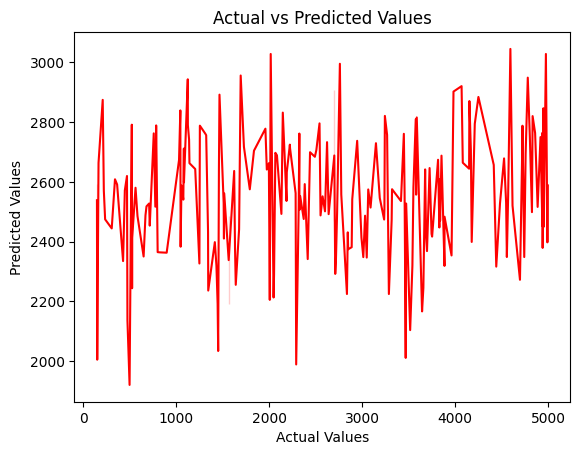

In [ ]:
from sklearn.ensemble import RandomForestRegressor
x = df1_num.drop(columns=['NT_proBNP'], axis=1)
y = df1_num['NT_proBNP']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

RF = RandomForestRegressor()
RF.fit(x_train, y_train)

y_pred = L.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

sns.lineplot(x=y_test, y=y_pred, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')